In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 

import tensorflow as tf 
from tensorflow.keras import models, layers 

plt.style.use("ggplot")

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv', na_values=['NA'])

In [3]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
df.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [5]:
X = df.drop(['1'],axis=1)
Y = df['1']

In [6]:
def getModel():

    model = models.Sequential()
    model.add(layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(layers.Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    model.summary()
    return model

In [7]:
model = getModel()
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


2021-10-02 23:35:12.957491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 23:35:12.963927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 23:35:12.964215: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 23:35:12.964914: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
history  = model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 0.6763 - accuracy: 0.6519
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6519
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6532
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6610
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6636
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.6714
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.6662
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.6871
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.6845
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.6858
Epoch 11/

In [9]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8057
accuracy: 80.57%


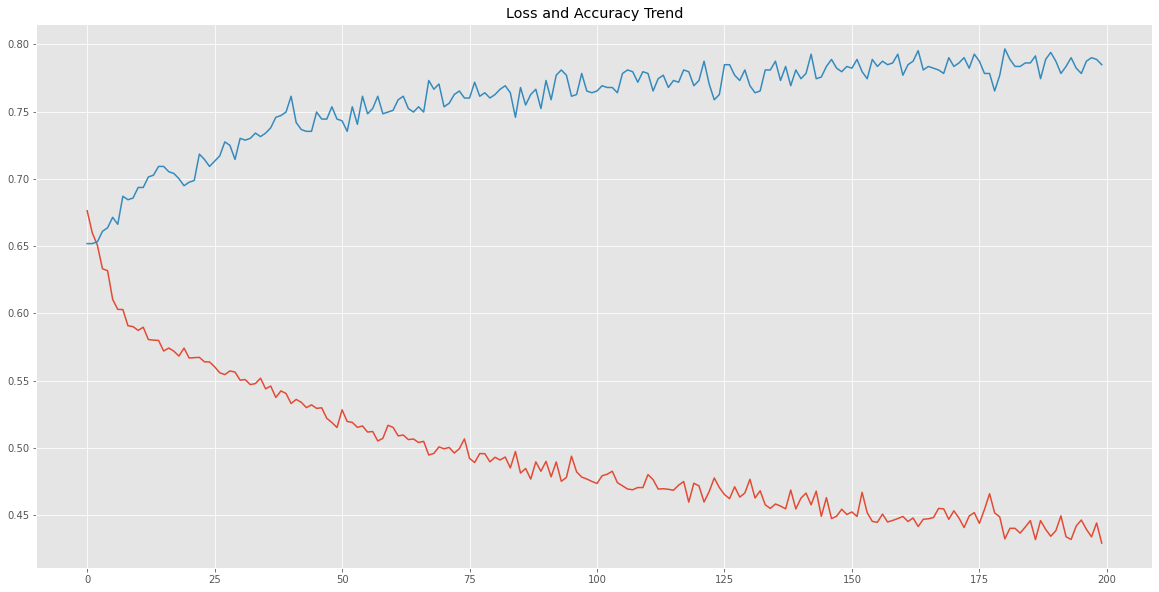

In [11]:
plt.figure(figsize = (20, 10))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.title("Loss and Accuracy Trend")
# plt.ylabel("Loss")
plt.show()

In [12]:
import keras.backend as K
def DiceLoss(targets, inputs, smooth=1e-6):
    
    #flatten label and prediction tensors
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)
    
    intersection = K.sum(K.dot(targets, inputs))
    dice = (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
    return 1 - dice

In [13]:
model1 = getModel()
model1.compile(loss='binary_crossentropy' , optimizer='SGD', metrics=['accuracy'])
history  = model.fit(X, Y, epochs=200, batch_size=10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7927
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7862
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7849
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4387 - accurac

In [14]:
scores = model1.evaluate(X, Y)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 956us/step - loss: 0.6894 - accuracy: 0.6519
accuracy: 65.19%


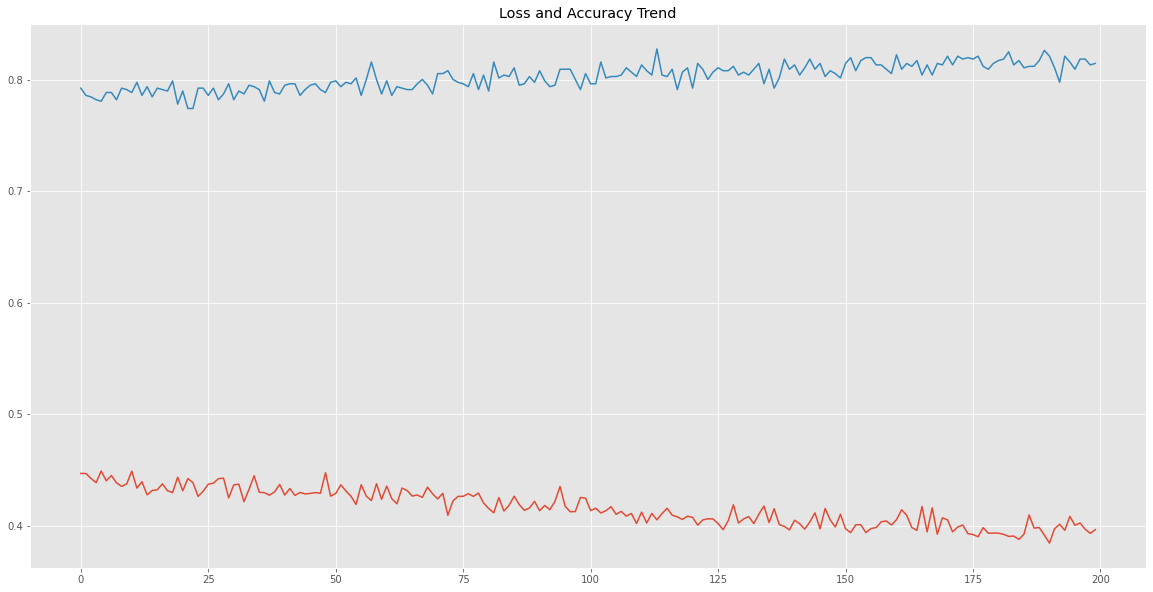

In [15]:
plt.figure(figsize = (20, 10))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.title("Loss and Accuracy Trend")
# plt.ylabel("Loss")
plt.show()